# Earthquakes 1990-2023

## 1. Introduction
Earthquake-related research is important for preventing and minimizing the effects of natural disasters. It helps to better understand geophysical processes, assess the seismic hazard of regions, improve early warning systems and prepare populations for potential emergencies. 

### Area of analysis
The purpose of the analysis is to identify the regions of the world that are most prone to significant earthquakes (magnitude >5.99). The geographic analysis will provide insight into the most hazardous areas and how their location is related to tectonic plates.

### Expectations
At the end of the work, it is expected that the regions of the world most prone to significant earthquakes will be identified, the relationship between the location of earthquakes and tectonic plates will be revealed.

### Questions asked
1. Where in the world have significant earthquakes been recorded?
2. How often do earthquakes with large damage (magnitude 7) occur?
3. Is there a relationship between the location of earthquakes and tectonic plates?


### What data do we have (generally)?

Temporal data: time (i.e. date).

Geographic data: coordinates, region.

Seismological data: Magnitude, epicenter depth.

Type of event, significance of the event.

Additional data: record status information, tsunami probability.

Data sources: international seismological observations.

## 2. Planned steps

### Methods for problem solution
Data processing, visualization and statistical analysis will be used to solve the problem of identifying the most earthquake-prone regions of the world.

Data processing, visualization and statistical analysis will be used to solve the problem of identifying the most earthquake-prone regions of the world.
Data processing will also filter data on significant events that affect regions and infrastructure.
Visualization will help to understand the geographical distribution of earthquakes.
Statistical analysis will help to understand what factors influence earthquake hazard.

### Individual steps
1. Data preparation
- Download and filter data on earthquakes with magnitude > 6.0.
- Exclude incorrect data with input errors and anomalies.

2. Exploring regions with significant earthquakes.

3. Visualization and analysis
- Plotting earthquakes on a map.
- Comparison with tectonic plates.

4. Analyzing rare and destructive earthquakes.
- Tsunami probability prediction.
- Predicting the dependence of earthquake locations on tectonic plate boundaries.

### Libraries

In [180]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import folium
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

## 3.1 Data - Earthquakes

Data source: international seismological organizations.

Marks that we cannot trust the data: Some events have the status of automatic, which means that they were registered by the system without verification by an expert. 

The dataset is represented by a Earthquakes-1990-2023.csv file weighing 471 MB and has about 3.5 million rows of records.



In [133]:
# Load the data
data = pd.read_csv('Earthquakes-1990-2023.csv')

# Display basic information about the dataset
print("Earthquakes Info:")
print(data.info())

# Data reading
data.head()


Earthquakes Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB
None


,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


### Data overview
There are details about the size, format, fields, and data types of the dataset used in this analysis.

In [134]:
print("\nMemory usage of each column:")
data.info(memory_usage='deep')

print("Size of the dataset (rows, columns):", data.shape)

print("\nData types of each column:")
print(data.dtypes)

# Descriptive statistics for numerical columns
print("\nStatistics:")
print(data.describe())


Memory usage of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.3 GB
Size of the dataset (rows, columns): (3445751, 12)

Data types of each column:
time              int64
place            object
status           object
tsunami           int64
significance      int64
data_type        object
magnitudo       float64
state            object
longitude       float64
latitude        float64
depth           float64
date             object
dtype: object

Statistics:
               time     

To process the data we need to find irrelevant values of the records and drop them.
First of all, we check if the dataset obtains the null values.

In [135]:
# Find unique records
print(data.nunique())

# Check for missing values
print("\nMissing Values Count:")
print(data.isnull().sum())

time            3428775
place            531130
status                6
tsunami               2
significance       1170
data_type            25
magnitudo           933
state               858
longitude        733599
latitude         518295
depth             78386
date            3428775
dtype: int64

Missing Values Count:
time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64


We are extremely lucky - no “Null” values!

Second example of such a bad values are duplicated ones.

In [136]:
# Finding duplicate rows
duplicate_rows = data[data.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 16869


,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
9214,636249654650,"3 km E of Mammoth Lakes, California",reviewed,0,42,earthquake,1.66,California,-118.933667,37.647000,3.816000,1990-03-01 00:00:54.650000+00:00
9216,636249667890,"4km N of Claremont, CA",reviewed,0,70,earthquake,2.13,California,-117.717000,34.133000,4.275000,1990-03-01 00:01:07.890000+00:00
9218,636249694400,"4km N of Claremont, CA",reviewed,0,62,earthquake,2.00,California,-117.717000,34.133000,4.275000,1990-03-01 00:01:34.400000+00:00
9220,636249712400,"5km NNE of Claremont, CA",reviewed,0,22,earthquake,1.20,California,-117.705000,34.144000,5.702000,1990-03-01 00:01:52.400000+00:00
9222,636249724170,"4km N of Claremont, CA",reviewed,0,160,earthquake,3.22,California,-117.714000,34.130000,5.622000,1990-03-01 00:02:04.170000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3386776,1677800561550,"6km WNW of Cobb, CA",automatic,0,2,earthquake,0.36,California,-122.790169,38.834667,1.590000,2023-03-02 23:42:41.550000+00:00
3386778,1677800571801,western Texas,reviewed,0,62,earthquake,2.00,western Texas,-104.407287,31.674925,7.185596,2023-03-02 23:42:51.801000+00:00
3386780,1677800938538,"49 km N of Petersville, Alaska",reviewed,0,35,earthquake,1.50,Alaska,-150.759600,62.942400,109.700000,2023-03-02 23:48:58.538000+00:00
3386782,1677801044380,"83 km NNW of Karluk, Alaska",reviewed,0,0,earthquake,0.04,Alaska,-155.069167,58.246000,4.900000,2023-03-02 23:50:44.380000+00:00


In [137]:
# Drop duplicates rows
data.drop_duplicates(keep='first', inplace=True)

After dropping demensions:

In [138]:
# New demensions of the dataset
print("Size of the dataset (rows, columns):", data.shape)

Size of the dataset (rows, columns): (3428882, 12)


Third problem is negative magnitude values, which is impossible according to Richter scale.
We want to eliminate all the records containing these negative values.
To check if strange values are removed, display the min and max values of magnitude.

In [139]:
# Eliminating physically impossible values
data = data[(data['magnitudo'] >= 1) & (data['magnitudo'] <= 10)]

# Check if strange values are removed
print(f"Min value: {data['magnitudo'].min()}")
print(f"Max value: {data['magnitudo'].max()}")

Min value: 1.0
Max value: 9.1


After eliminating demensions:

In [140]:
# New demensions of the dataset
print("Size of the dataset (rows, columns):", data.shape)

Size of the dataset (rows, columns): (2491512, 12)


Next step is to transform the date and time data into its correct type.

In [141]:
# Convert the 'time' column to datetime, assuming it's in milliseconds
data['time'] = pd.to_datetime(data['time'], unit='ms')

# Format the time to '%H:%M:%S' as a string
data['time'] = data['time'].dt.strftime('%H:%M:%S')

# Check the result
print(data['time'].head())

0    00:22:33
1    00:24:51
2    00:34:43
4    01:03:44
5    01:04:13
Name: time, dtype: object


In [142]:
# Convert the 'date' column to datetime data type
data['date'] = pd.to_datetime(data['date'], errors='coerce')

data['date'] = data['date'].dt.date

Updated dataset with corrected date and time columns:

In [143]:
print(data.head())

       time                              place    status  tsunami  \
0  00:22:33  12 km NNW of Meadow Lakes, Alaska  reviewed        0   
1  00:24:51         14 km S of Volcano, Hawaii  reviewed        0   
2  00:34:43         7 km W of Cobb, California  reviewed        0   
4  01:03:44             16km N of Fillmore, CA  reviewed        0   
5  01:04:13             16km N of Fillmore, CA  reviewed        0   

   significance   data_type  magnitudo        state   longitude   latitude  \
0            96  earthquake       2.50       Alaska -149.669200  61.730200   
1            31  earthquake       1.41       Hawaii -155.212333  19.317667   
2            19  earthquake       1.11   California -122.806167  38.821000   
4           134  earthquake       2.95   California -118.934000  34.546000   
5           118  earthquake       2.77   California -118.923000  34.543000   

    depth        date  
0  30.100  1990-01-01  
1   6.585  1990-01-01  
2   3.220  1990-01-01  
4  16.122  1990-01-0

Now we are ready to go deeper into our data, thus let me filter earthquakes with magnitude value greater then 5.
Why do we want so? The answear is that there exista Richter scale where magnitude 6.0-6.9 is Strong, magnitude 7.0-7.9 is Major, magnitude 8.0-8.9 is Great and magnitude 9.0-9.9 is Extreme.
We are interested in these particular ones.

In [144]:
# Filter earthquakes with magnitudo greater than 7
filtered_data = data[data['magnitudo'] > 5.99]

# New demensions of the dataset
print("Size of the dataset (rows, columns):", filtered_data.shape)


Size of the dataset (rows, columns): (4924, 12)


In case there are extra space before or after name of the state, we strip the string containing the name.

In [145]:
data['state'] = data['state'].str.strip()

## 3.2 Data - Tectonic Plates

This data contains latitude and longitude data that completely encloses 56 tectonic plates.

This data was made possible thanks to Bird (2003) and Argus et al. (2011).

In [146]:
# Load the data
plates = pd.read_csv('Tectonic-Plate-Boundaries.csv')

# Display basic information about the dataset
print("Tectonic Plates Info:")
print(plates.info())

# Data reading
plates.head()

Tectonic Plates Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12321 entries, 0 to 12320
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   plate   12321 non-null  object 
 1   lat     12321 non-null  float64
 2   lon     12321 non-null  float64
dtypes: float64(2), object(1)
memory usage: 288.9+ KB
None


,plate,lat,lon
0,am,30.754,132.824
1,am,30.970,132.965
2,am,31.216,133.197
3,am,31.515,133.500
4,am,31.882,134.042


In [147]:
# Find unique records
print(plates.nunique())

# Check for missing values
print("\nMissing Values Count:")
print(plates.isnull().sum())

plate      56
lat      5707
lon      5747
dtype: int64

Missing Values Count:
plate    0
lat      0
lon      0
dtype: int64


We are extremely lucky, again - no “Null” values!

Second example of such a bad values are duplicated ones.

In [148]:
# Finding duplicate rows
duplicate_rows = plates[plates.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 513


,plate,lat,lon
17,am,35.034,138.674
59,am,54.035,142.409
148,am,34.252,126.263
153,am,31.471,123.364
164,am,31.793,129.442
...,...,...,...
12222,yz,24.691,121.575
12256,yz,31.793,129.442
12267,yz,31.471,123.364
12319,yz,18.438,114.000


In [149]:
# Drop duplicates rows
plates.drop_duplicates(keep='first', inplace=True)

After dropping demensions:

In [150]:
# New demensions of the dataset
print("Size of the dataset (rows, columns):", plates.shape)

Size of the dataset (rows, columns): (11808, 3)


Let's filter the dataset so that latitude and longitude have the correct range of values.

In [151]:
# Data filtering: leave only rows with valid values
plates = plates[plates["lat"].between(-90, 90) & plates["lon"].between(-180, 180)]

After dropping demensions:

In [152]:
# New demensions of the dataset
print("Size of the dataset (rows, columns):", plates.shape)

Size of the dataset (rows, columns): (11808, 3)


## 4. Exploratory analysis

### Basic statistics
1. Analysis of earthquake distribution by date

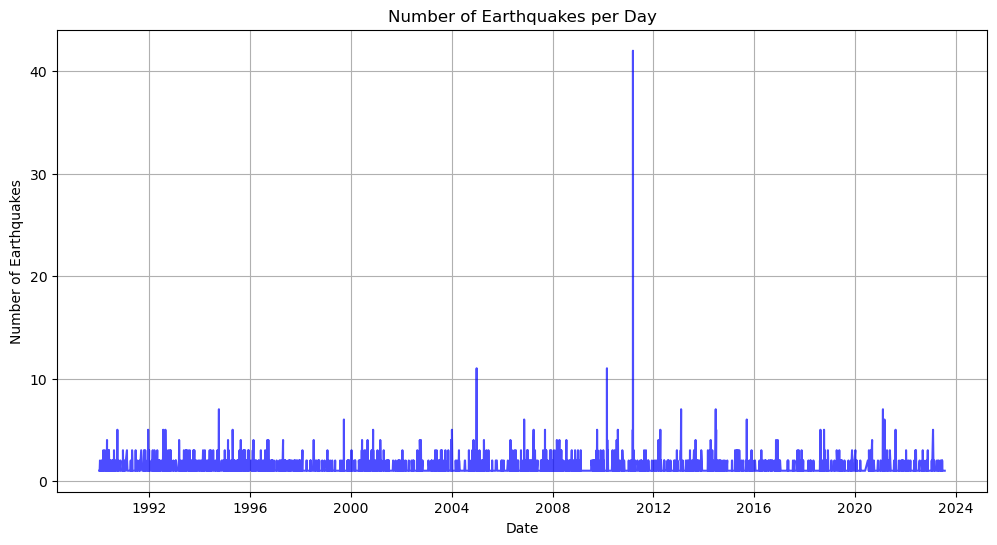

In [153]:
# Plot a histogram of the magnitude of earthquakes per year using Seaborn
daily_counts = filtered_data.groupby('date').size()

plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', color='blue', alpha=0.7)
plt.title('Number of Earthquakes per Day')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.grid()
plt.show()

The plot shows the number of strong (≥6.0 magnitude) earthquakes recorded each day, from 1990 to 2023. There is a pronounced peak in the plot around 2011-2012, indicating an abnormally high number of earthquakes in these days. This may be related to a major natural event, such as the 2011 earthquake in Japan.

2. Magnitude distribution analysis

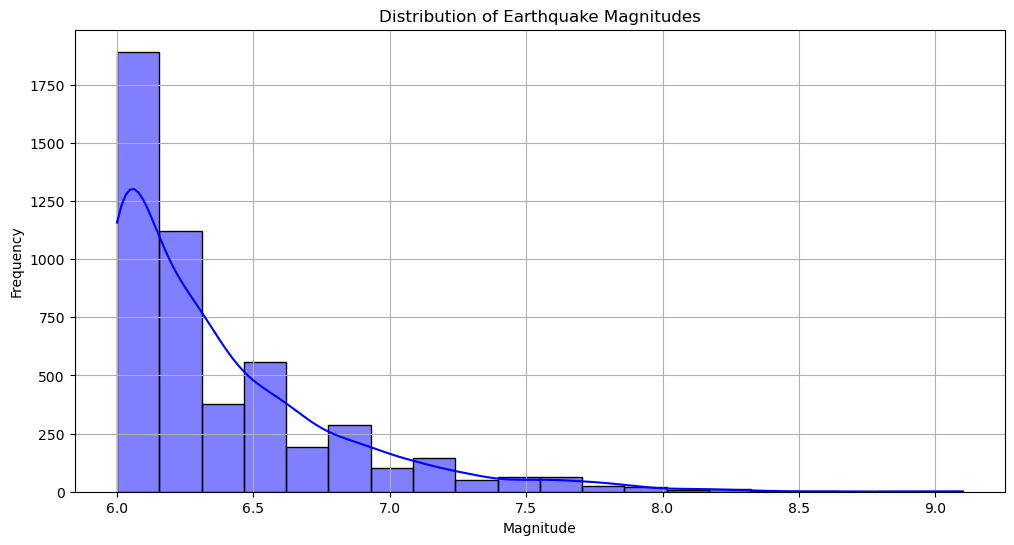

In [154]:
# Magnitude distribution analysis
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['magnitudo'], bins=20, kde=True, color="blue")
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The plot shows the distribution of earthquake magnitudes (≥6.0) using a histogram and density line. The distribution is decreasing: as the magnitude increases (6.5 and above), the frequency of events decreases significantly. The density line (blue line) confirms that the greatest concentration of earthquakes occurs at magnitudes around 6.2-6.3.

3. Analysis of earthquake frequency by time of day

C:\Users\alipa\AppData\Local\Temp\ipykernel_32584\2411252633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = pd.to_datetime(filtered_data['time'], format='%H:%M:%S').dt.hour


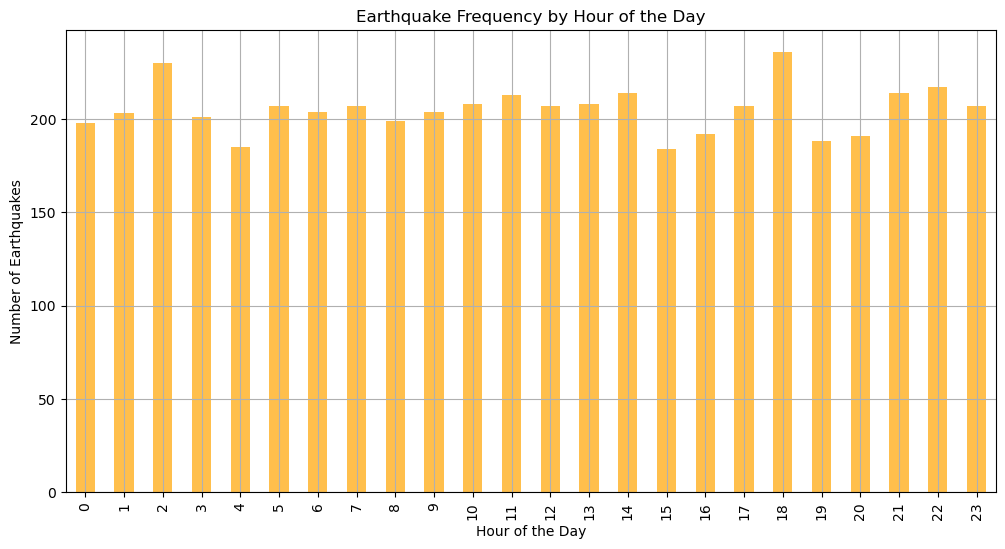

In [155]:
# Convert time to hours
filtered_data['hour'] = pd.to_datetime(filtered_data['time'], format='%H:%M:%S').dt.hour

# Distribution of earthquakes by hour of day
hourly_counts = filtered_data.groupby('hour').size()

# Visualization
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Earthquake Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Earthquakes')
plt.grid()
plt.show()

The plot shows the distribution of earthquake frequency (magnitude ≥6.0) by hour of the day. The frequency of earthquakes is relatively evenly distributed throughout the day, which is characteristic of a natural phenomenon that does not depend on the time of day.

4. Analysis of earthquake magnitude trends over the years:

C:\Users\alipa\AppData\Local\Temp\ipykernel_32584\517985327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
C:\Users\alipa\AppData\Local\Temp\ipykernel_32584\517985327.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = filtered_data['date'].dt.year


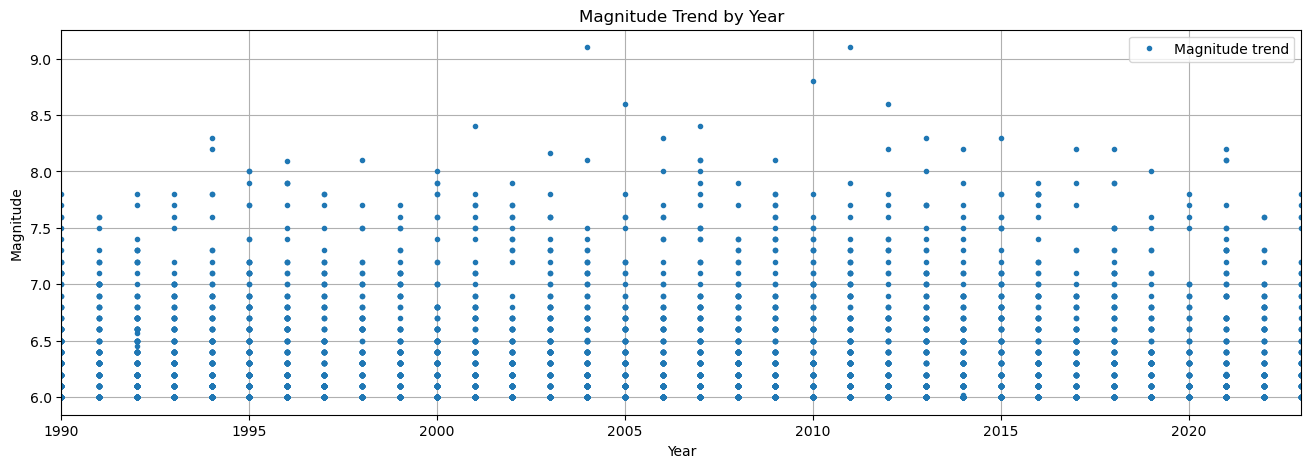

In [156]:
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extract the year from the date
filtered_data['year'] = filtered_data['date'].dt.year

# Create the plot with proper axis labels and year range
plt.figure(figsize=(16, 5))
plt.plot(filtered_data['year'], filtered_data['magnitudo'], '.', label='Magnitude trend')

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('Magnitude Trend by Year')

# Limit x-axis to the year range
plt.xlim(1990, 2023)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

The plot shows the trend of earthquakes with magnitude 6 and above for the period from 1990 to 2023. In general, there is a uniform distribution of magnitude values with small fluctuations. There is no pronounced increase or decrease in average magnitude over time.

5. Average earthquake magnitudes by year

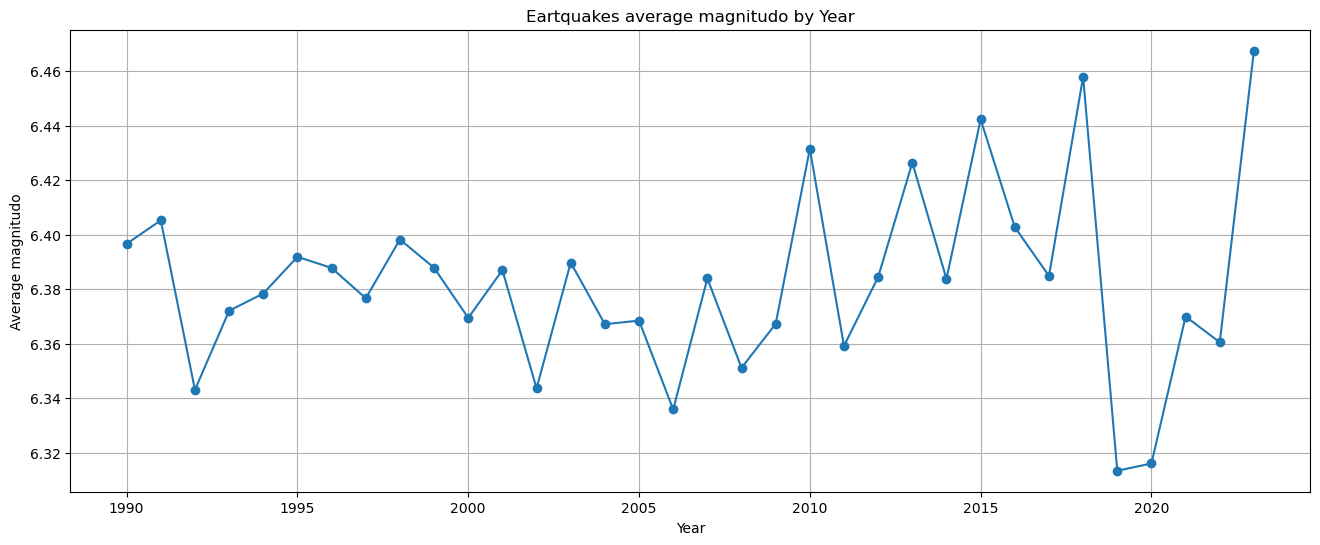

In [157]:
# Extract temporal components (hour, day of the month, weekday, 
# month, month name, and year) from the date column for detailed analysis
def transform_date(df):
    df = df.copy()
    df["hour"] = df.date.dt.hour
    df["day_of_month"] = df.date.dt.day
    df["weekday"] = df.date.dt.day_name()
    df["month"] = df.date.dt.month
    df["month_name"] = df.date.dt.month_name()
    df["year"] = df.date.dt.year
    return df

transformed_data = transform_date(filtered_data)

# Visualization
yearly_avg_magnitude = transformed_data.groupby('year')['magnitudo'].mean()
plt.figure(figsize=(16, 6))
yearly_avg_magnitude.plot(kind='line', marker='o')
plt.title('Eartquakes average magnitudo by Year')
plt.xlabel('Year')
plt.ylabel('Average magnitudo')
plt.grid()
plt.show()


The plot shows the change in the average magnitude of earthquakes (with magnitude ≥ 6) for each year from 1990 to 2023. The average magnitude over the analyzed period remains fairly stable, ranging from 6.32 to 6.46. Significant peaks (e.g., in 2010 and 2022) and declines (e.g., in 2021) may be associated with rare events or large earthquakes.

6. Correlation Matrix

C:\Users\alipa\AppData\Local\Temp\ipykernel_32584\1898701356.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  without_str_data['data_type'] = without_str_data['data_type'].replace({'earthquake':0, 'nuclear explosion':1})


Data type: earthquake = 0, nuclear explosion = 1
         tsunami  significance  data_type  magnitudo  longitude  latitude  \
451            0           650          0        6.5  -172.8500  -15.3970   
683            0           554          0        6.0  -106.7950   18.8630   
842            0           554          0        6.0    92.9870  -10.6810   
1119           0           554          0        6.0  -169.4460   52.0380   
1240           0           611          0        6.3    95.2410   24.7530   
...          ...           ...        ...        ...        ...       ...   
3441336        1           896          0        7.2  -160.7604   54.4596   
3441774        0           900          0        6.6   -70.4688  -38.1951   
3442480        0           784          0        6.5   -88.1265   12.8140   
3444312        0           554          0        6.0   178.7628  -24.1376   
3444988        1           632          0        6.4   167.9249  -14.7565   

           depth  hour    

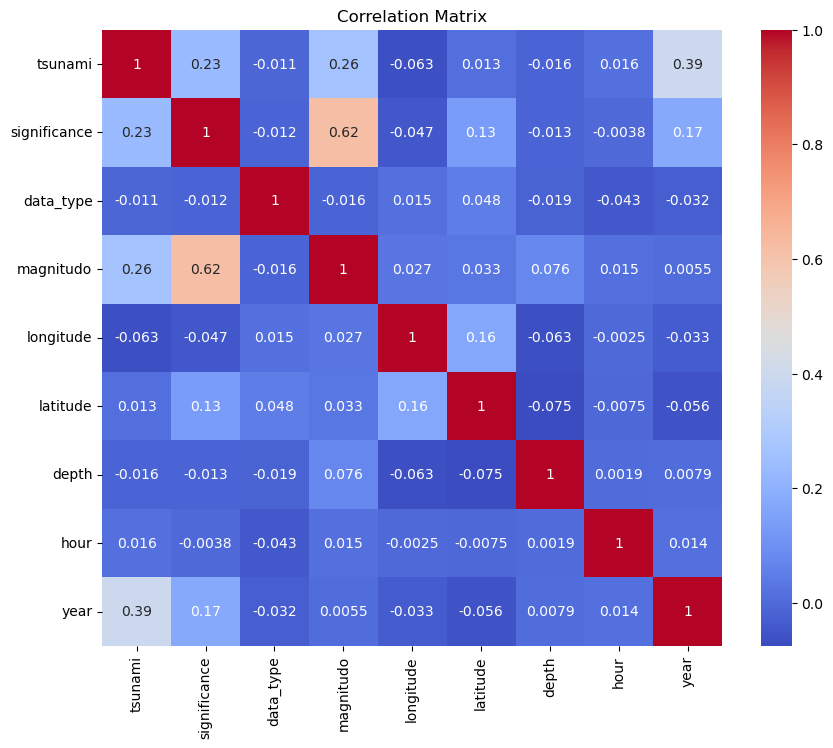

In [161]:
without_str_data = filtered_data.drop(['place', 'state', 'time', 'date', 'status'], axis=1)

without_str_data['data_type'] = without_str_data['data_type'].replace({'earthquake':0, 'nuclear explosion':1})

print("Data type: earthquake = 0, nuclear explosion = 1")
print(without_str_data)

corr_matrix = without_str_data.corr()
print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The graph represents a correlation matrix showing the linear relationships between different numerical variables in the filtered earthquake dataset (magnitude ≥ 6).

The relationship between magnitude and significance:

    The correlation coefficient (0.62) indicates a moderate positive relationship between earthquake magnitude and significance. This is expected since earthquakes of higher magnitude usually have greater impact and consequences.

Magnitude and tsunami (0.26):

    Although the relationship is positive, its strength is relatively weak, implying that not every large earthquake results in a tsunami. It is likely that other factors such as epicenter depth and geographic location (e.g., ocean floor) play an important role.

Geographic coordinates (longitude and latitude) and magnitude:

    There is almost no dependence of magnitude on coordinates, indicating that the strength of earthquakes is not limited to specific regions. This confirms that earthquakes can have a large magnitude at any location associated with active tectonics.

Depth and magnitude (0.076):

    The weak relationship between epicenter depth and magnitude suggests that large earthquakes can occur at both shallow and deep depths, without a clear trend.

Event type and significance (-0.012):

    There is virtually no correlation between event type (earthquake or nuclear explosion) and significance. This emphasizes the differences in their characteristics and the nature of event registration.


### Geospatial analysis

1. Visualize the tectonic plates on a map.

In [178]:
#Ploting the tectonic plate's boundaries 
tectonic = folium.Map(tiles="cartodbpositron", zoom_start=10)

plates_list = list(plates["plate"].unique())
for plate in plates_list:
    plate_vals = plates[plates["plate"] == plate]
    lats = plate_vals["lat"].values
    lons = plate_vals["lon"].values
    points = list(zip(lats, lons))
    indexes = [None] + [i + 1 for i, x in enumerate(points) if i < len(points) - 1 and abs(x[1] - points[i + 1][1]) > 300] + [None]
    for i in range(len(indexes) - 1):
        folium.vector_layers.PolyLine(points[indexes[i]:indexes[i+1]], popup=plate, color="#58508d", fill=False, ).add_to(tectonic)

tectonic

2. Scatter plot on a map (magnitude dependence)

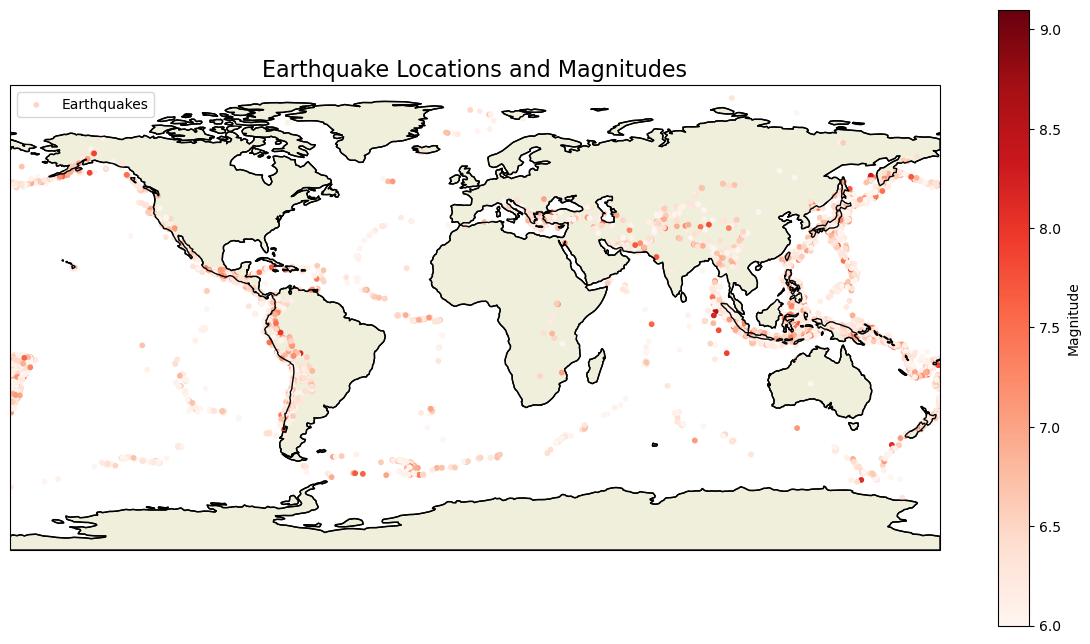

In [174]:
# Customizing map boundaries
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Plotting earthquake points
scatter = ax.scatter(
    transformed_data["longitude"], 
    transformed_data["latitude"], 
    c=transformed_data["magnitudo"], 
    cmap="Reds", 
    s=10, 
    alpha=1, 
    transform=ccrs.PlateCarree(),
    label="Earthquakes"
)

# Adding a color scale
cbar = plt.colorbar(scatter, ax=ax, orientation="vertical", shrink=0.8)
cbar.set_label("Magnitude")

# Adding a legend and title
plt.title("Earthquake Locations and Magnitudes", fontsize=16)
plt.legend(loc="upper left")
plt.show()

The dots on the map indicate the location of earthquake epicenters, and their color intensity reflects the magnitude of the events. Most earthquakes are centered along tectonic plate boundaries, including areas of the Pacific Ring of Fire. High concentrations of earthquakes are found in Japan, Indonesia, Chile, and along the west coast of the Americas. Fewer large earthquakes are seen in the central regions of the continents, confirming the link between earthquakes and tectonic activity.

3. Scatter plot on a map (depth dependence)

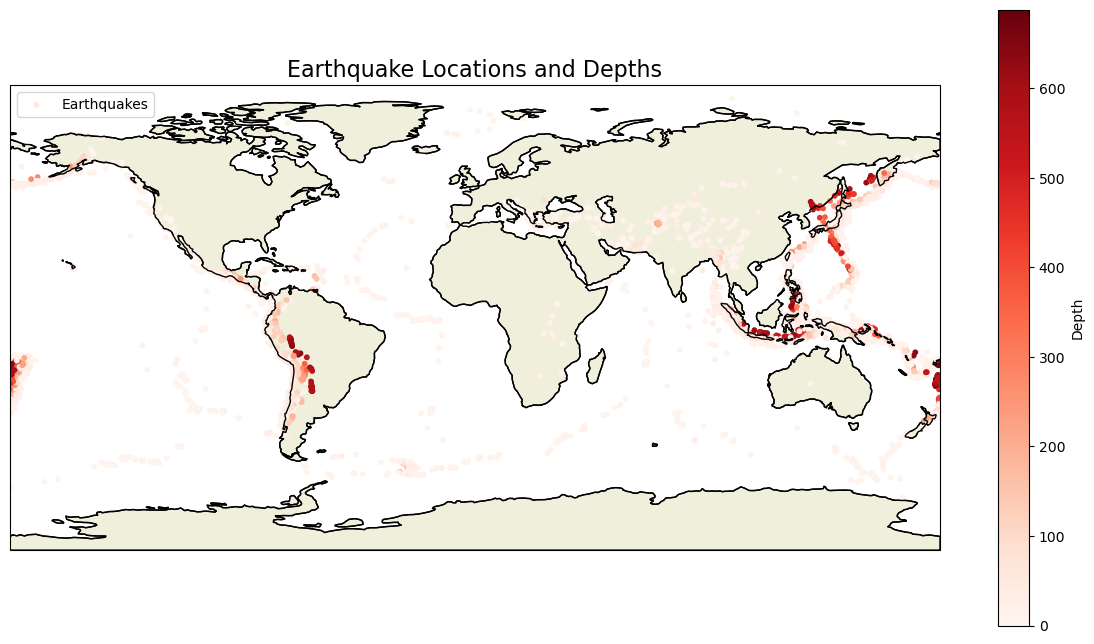

In [160]:
# Customizing map boundaries
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Plotting earthquake points
scatter = ax.scatter(
    transformed_data["longitude"], 
    transformed_data["latitude"], 
    c=transformed_data["depth"], 
    cmap="Reds", 
    s=10, 
    alpha=1, 
    transform=ccrs.PlateCarree(),
    label="Earthquakes"
)

# Adding a color scale
cbar = plt.colorbar(scatter, ax=ax, orientation="vertical", shrink=0.8)
cbar.set_label("Depth")

# Adding a legend and title
plt.title("Earthquake Locations and Depths", fontsize=16)
plt.legend(loc="upper left")
plt.show()

The plot shows the location of the epicenters of earthquakes with magnitudes of 6 and above around the world. The color scale indicates the depth of earthquakes in kilometers, from shallow (light colors) to deep (dark colors). Most earthquakes are centered along tectonic plate boundaries such as the Pacific Fire Belt, the East Pacific Rise, and the Mediterranean-Asian zone. Deep earthquakes are more common in subduction zones such as the Japanese Island Arc, the Andean Ridge in South America, and the Philippine Zone. Shallow earthquakes are generally characteristic of plate divergence and transformation zones.

## 5. Modeling

### Tsunami probability prediction (logistic regression)


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Filter the data for tsunami analysis
tsunami_data = filtered_data[["magnitudo", "depth", "latitude", "longitude", "tsunami"]]

# Separate target variable (tsunami) and attributes
X_tsunami = tsunami_data.drop(columns=["tsunami"])
y_tsunami = tsunami_data["tsunami"]

# Split into training and test data
X_train_tsu, X_test_tsu, y_train_tsu, y_test_tsu = train_test_split(X_tsunami, y_tsunami, test_size=0.3, random_state=42)

# Logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tsu, y_train_tsu)

# Prediction
y_pred_tsu = log_reg.predict(X_test_tsu)

# Model estimation
print("Accuracy:", accuracy_score(y_test_tsu, y_pred_tsu))
print("Classification Report:\n", classification_report(y_test_tsu, y_pred_tsu))
print("Confusion Matrix:\n", confusion_matrix(y_test_tsu, y_pred_tsu))


Accuracy: 0.9066305818673883
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1347
           1       0.23      0.02      0.04       131

    accuracy                           0.91      1478
   macro avg       0.57      0.51      0.50      1478
weighted avg       0.85      0.91      0.87      1478

Confusion Matrix:
 [[1337   10]
 [ 128    3]]


Determine the probability of a tsunami based on latitude, longitude, depth, and magnitude.

Accuracy: In this case, the accuracy of the model was ~0.91 (90.66%), indicating good prediction of most events.

True Positives (31): Events where the model correctly predicted the presence of a tsunami.

False Positives (10): Events where the model incorrectly predicted the tsunami.

False Negatives (128): Events where there was a tsunami but the model did not predict it.

True Negatives (1337): Events where a tsunami did not occur and the model correctly predicted it.


-> For Class 0 (No Tsunami):
Precision: 0.91 - of all predicted “no tsunami” events, 91% were correctly classified.
Recall (Completeness): 0.99 - of all actual “no tsunami” events, 99% were correctly identified by the model.
F1-score: 0.95 - harmonic mean of accuracy and completeness for class 0. The value is high, confirming good model performance for this class.

-> For Class 1 (Tsunami):
Precision: 0.23 - of all the “tsunami” cases predicted, only 23% were correct.
Recall: 0.02 - of all actual “tsunami” cases, only 2% were correctly identified.
F1-score: 0.04 - a low value indicates that the model does a poor job of classifying tsunamis.

The model does a good job of classifying events where no tsunami is present (class 0), with high accuracy (91%) and completeness (99%).
However, the model performs poorly in tsunami prediction (class 1) because:
Completeness (Recall) for tsunamis is only 2%, which means that most real tsunami cases were not predicted.
The low Precision and F1-score confirm that the model is ineffective for class 1.


### Predicting the dependence of earthquake locations on tectonic plate boundaries

Let's build a model that uses earthquake and tectonic plate data to predict whether a particular earthquake (magnitudes greater than 6) is near a plate boundary.

First, we need to calculate the distance from each earthquake point to the nearest tectonic plate boundary.

In [169]:
# Compute pairwise distances to nearest plates
def calculate_distances(earthquakes, plates):
    eq_coords = earthquakes[["latitude", "longitude"]].values
    plate_coords = plates[["lat", "lon"]].values

    # Broadcasting to compute pairwise distances
    diff = eq_coords[:, None, :] - plate_coords[None, :, :]
    distances = np.sqrt(np.sum(diff**2, axis=2))

    # Find the minimum distance for each earthquake
    min_distances = np.min(distances, axis=1)
    earthquakes["distance_to_plate"] = min_distances
    return earthquakes

# Applying a function to the data
filtered_data = calculate_distances(filtered_data, plates)

# Adding a binary feature
filtered_data["near_plate_boundary"] = (filtered_data["distance_to_plate"] < 0.5).astype(int)

# Output the result
print(filtered_data)

             time                                   place    status  tsunami  \
451      05:32:21             118 km ENE of Hihifo, Tonga  reviewed        0   
683      18:27:00  189 km SW of La Cruz de Loreto, Mexico  reviewed        0   
842      21:44:56                      South Indian Ocean  reviewed        0   
1119     19:44:34          107 km SSW of Nikolski, Alaska  reviewed        0   
1240     18:51:29             120 km E of W?ngjing, India  reviewed        0   
...           ...                                     ...       ...      ...   
3441336  06:48:22           98 km S of Sand Point, Alaska  reviewed        1   
3441774  03:05:11         18 km SE of Loncopué, Argentina  reviewed        0   
3442480  00:22:07        43 km S of Intipucá, El Salvador  reviewed        0   
3444312  02:49:57               south of the Fiji Islands  reviewed        0   
3444988  12:44:35         96 km ENE of Port-Olry, Vanuatu  reviewed        1   

         significance   data_type  magn

C:\Users\alipa\AppData\Local\Temp\ipykernel_32584\366137265.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquakes["distance_to_plate"] = min_distances
C:\Users\alipa\AppData\Local\Temp\ipykernel_32584\366137265.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["near_plate_boundary"] = (filtered_data["distance_to_plate"] < 0.5).astype(int)


The study found that regression was not an appropriate way to predict such data (the report will not specify). 

We will forecast using Random Forest model.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       885
           1       1.00      1.00      1.00       593

    accuracy                           1.00      1478
   macro avg       1.00      1.00      1.00      1478
weighted avg       1.00      1.00      1.00      1478

Confusion Matrix:
[[885   0]
 [  0 593]]
Feature: latitude, Importance: 0.017831142976043535
Feature: longitude, Importance: 0.008817825221718452
Feature: depth, Importance: 0.045052489433635434
Feature: distance_to_plate, Importance: 0.9282985423686027


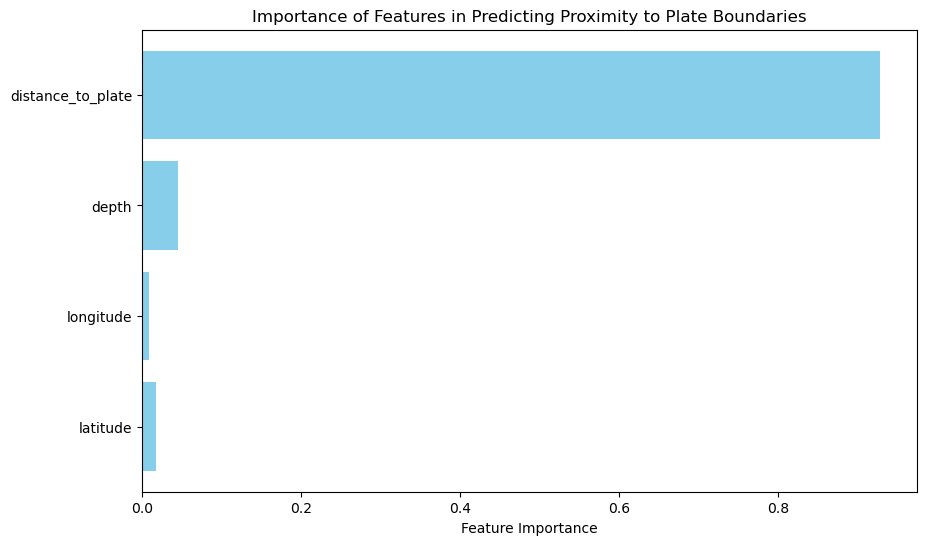

In [172]:
features = ['latitude', 'longitude', 'depth', 'distance_to_plate']
target = 'near_plate_boundary'

X = filtered_data[features]
y = filtered_data[target]

# Data normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Random Forest training
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Model quality assessment
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Significance of features
importances = model.feature_importances_
for feature, importance in zip(features, importances):
    print(f"Feature: {feature}, Importance: {importance}")

# Visualization of feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Importance of Features in Predicting Proximity to Plate Boundaries')
plt.show()

Precision: The precision for classes 0 and 1 is 1.00, indicating that all model predictions for both classes were completely accurate.

Recall: The recall is also 1.00, indicating that the model correctly classified all objects in both classes.

F1-score: The harmonic mean of accuracy and completeness is also 1.00, which confirms that the model performed the classification task perfectly.

Support: Support shows that class 0 (earthquakes far from the plates) contains 885 objects and class 1 (earthquakes near the plates) contains 593 objects.

Accuracy: The overall accuracy of the model is 1.00 (100%).

Confusion Matrix

[885 0]: All 885 objects in class 0 were correctly classified.
[0 593]: All 593 class 1 objects were also correctly classified.

Feature Importance
The most significant feature for the model is the distance to the tectonic plate. Its contribution to the accuracy of the model is 92.83%.

## Summary

In this report, a natural phenomenon such as an earthquake was investigated. In particular, only those events considered to be the most destructive, i.e. with a magnitude of at least 6 on the Richter scale, were considered. The following data were analyzed using the earthquake datasets and tectonic plate locations: earthquake frequency by year, magnitude distribution, earthquake frequency by time of day, and average magnitude by year. Also visualized were: tectonic plate location map, point plot of earthquake locations and magnitudes, point plot of earthquake locations and depths. The correlation matrix revealed that the greatest dependence is present for magnitude and significance, which is obvious, as well as a non-significant dependence for magnitude and tsunami. Finally, two models were constructed that predict tsunamis and the dependence of earthquakes on the location of tectonic plates.